In [3]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile,QuantumRegister,ClassicalRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://docs.quantum-computing.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

**Delayed-Choice Eraser**

Our decision of how to measure a quantum system right now can influence whether it behaced as a particle or a wave. This is the Quantum Eraser paradox.

It is kind of an extension to the Double Slit Experiment. We saw earlier that if we pass a single photon through 2 slits,it would behave as calssical wave, on the other hand we tried to detect which slit it went through , the photon started to behave as a classical particle. This time we would see how trying to measure it in different basis, affects the"past" of the photon For eg we try to measure the photon in z bases or say x basis we get the same behavior as a classical particle. However, the the thing is if try to measure it in X bases ,that destroys the pathway information,we can seperate out which X state it went through as each will have a spike corresponding to the slit, i.e. they would individualy produce an interfernece pattern on the screen.These two interferences add together to give same pattern as a classical particle.

So since we can measure whenever we want, and our choice of measurement leads to different results,the present is somehow changing the past.

We can resolve this using the Mach Zander Interferometer:

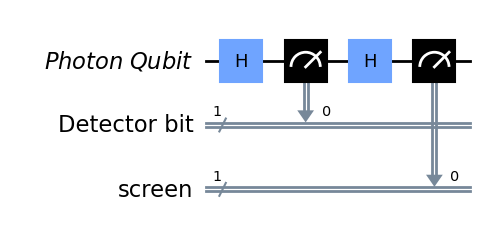

In [7]:
qr=QuantumRegister(1,name="Photon Qubit")
cr=ClassicalRegister(1,name="screen")
cr2=ClassicalRegister(1,name="Detector bit")
qc=QuantumCircuit(qr,cr2,cr)
qc.h(0)
qc.measure(0,0)
qc.h(0)
qc.measure(0,1)
qc.draw("mpl")

In [8]:
from qiskit_aer import AerSimulator
backend=AerSimulator()
results=backend.run(qc).result().get_counts()
print(results)

{'0 0': 267, '1 0': 244, '0 1': 254, '1 1': 259}


Now instead of having the photon to interact with a classical system,we get it to interact with a controlled quantum system. We can choose to measure later this quantum system to see which path the photon went through.

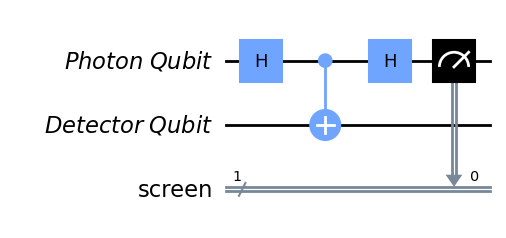

In [10]:
qr=QuantumRegister(1,name="Photon Qubit")
cr=ClassicalRegister(1,name="screen")
qr2=QuantumRegister(1,name="Detector Qubit")
qc=QuantumCircuit(qr,qr2,cr)
qc.h(0)
qc.cx(0,1)
qc.h(0)
qc.measure(0,0)
qc.draw("mpl")

In [11]:
results=backend.run(qc).result().get_counts()
print(results)

{'0': 528, '1': 496}


As we can see now half the times photon is in 0 state and other half times in 1,indicating no interference pattern. We now have a choice on how to measure the detector qubit.

Measurement in standard Z basis

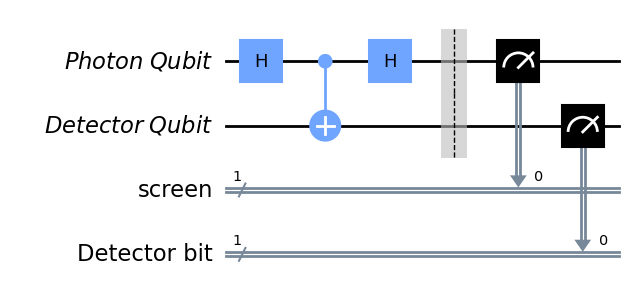

In [19]:
qc2=QuantumCircuit(qr,qr2,cr,cr2)
qc2.h(0)
qc2.cx(0,1)
qc2.h(0)
qc2.barrier()
qc2.measure(0,0)
qc2.measure(1,1)
qc2.draw("mpl")

In [16]:
results=backend.run(qc2).result().get_counts()
print(results)

{'1': 515, '0': 509}


We just got random distribution, we can not get any intereference here.

Making an X measurement

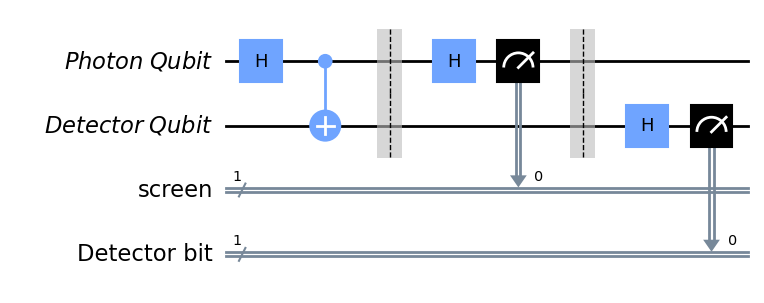

In [22]:
qc2=QuantumCircuit(qr,qr2,cr,cr2)
qc2.h(0)
qc2.cx(0,1)
qc2.barrier()
qc2.h(0)
qc2.measure(0,0)
qc2.barrier()
qc2.h(1)
qc2.measure(1,1)

qc2.draw("mpl")

In [23]:
results=backend.run(qc2).result().get_counts()
print(results)

{'0 0': 479, '1 1': 545}


We may not have got information on ehich path was chosen but we now know if photon qubit was 1,detector qubit was 1 and if phton qubit was 0, it was zero. This is analogous to photn hiting the screen into 2 sets, each indivisually showing bright and dark spots charactersitic of interference.

In the case of X measurement, the past was not changed it was just that the two qubits had become entangled, and the outcomes were fully correlated. The photon just decoheres after interaction with the detector qubit.